In [1]:
import os
import pandas as pd
import numpy as np
from os.path import isdir
from flask import Flask, render_template, request
from werkzeug.wrappers import Request, Response
import importlib

 * Running on http://localhost:3000/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Jun/2021 17:34:01] "GET / HTTP/1.1" 200 -


0


Using TensorFlow backend.


Filename :  C.jpeg
Checking extension...
Path:  C:\Users\samkit\Tensorflow_Testing\IBM_Project\class_photo\C..jpg
Loading and Displaying image... 
Creating MTCNN object for detection...
Number of faces detected:  4


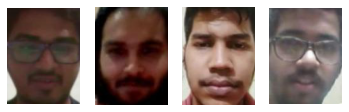

C:\Users\samkit\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
127.0.0.1 - - [01/Jun/2021 17:34:50] "POST /submit HTTP/1.1" 200 -


Deleted Screensho
1
Filename :  test2.jpeg
Checking extension...
Path:  C:\Users\samkit\Tensorflow_Testing\IBM_Project\class_photo\test2..jpg
Loading and Displaying image... 
Creating MTCNN object for detection...
Number of faces detected:  4


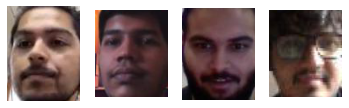

C:\Users\samkit\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
127.0.0.1 - - [01/Jun/2021 17:36:00] "POST /submit HTTP/1.1" 200 -


Deleted Screenshots!


In [ ]:
app = Flask(__name__)

PATH = os.getcwd()+'\\class_photo\\'
if (not os.path.isdir(PATH)):
    os.mkdir(PATH)
global i
i = 0

@app.route('/')
def main():
    return render_template('capture_attendance.html')

@app.route('/submit', methods=['POST'])
def check_att():
    global i 
    ##-----saves_images----------##
    temp = request.files['image']
    temp1 = PATH + temp.filename
    temp.save(temp1)
    
    ##-------Runs_driver2_code-----------##
    if i == 0:
        import ipynb.fs.full.driver_code2 as fd
        i = 1
    else:
        import ipynb.fs.full.driver_code2 as fd
        importlib.reload(fd)
    
    ##-----Attendace_list-------##
    arr  = np.array(fd.df)
    return render_template('capture_attendance.html', data=arr, temp=1)

@app.route('/trained')
def train():
    
    ##-------Runs_driver2_code-----------##
    import ipynb.fs.full.driver_code1 as dc
    return render_template('capture_attendance.html')

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 3000, app)